<a href="https://colab.research.google.com/github/rachitt-t/AI-in-healthcare/blob/main/pima_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import warnings
warnings.filterwarnings("ignore")


In [19]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for c in cols_with_zero:
    df[c] = df[c].replace(0, np.nan)
    df[c] = df[c].fillna(df[c].median())


In [21]:
df["Glucose_BMI"] = df["Glucose"] * df["BMI"]
df["Age_bin"] = pd.cut(df["Age"], bins=[20,30,40,50,60,100], labels=False).fillna(0).astype(int)


In [22]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=22
)


In [23]:
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)


In [24]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=12,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=22,
    n_jobs=-1
)

rf.fit(X_train_s, y_train)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=12,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=500, n_jobs=-1, random_state=22)

In [25]:
probs = rf.predict_proba(X_test_s)[:,1]
best_th = 0.5830827067669173
preds = (probs >= best_th).astype(int)


In [26]:
print("Accuracy:", accuracy_score(y_test, preds))
print("ROC-AUC:", roc_auc_score(y_test, probs))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds))

print("\nClassification Report:")
print(classification_report(y_test, preds))


Accuracy: 0.8138528138528138
ROC-AUC: 0.8619753086419752

Confusion Matrix:
[[132  18]
 [ 25  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       150
           1       0.76      0.69      0.72        81

    accuracy                           0.81       231
   macro avg       0.80      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



In [27]:
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
fi


,0
Glucose_BMI,0.235987
Glucose,0.176797
BMI,0.115911
Age,0.092837
DiabetesPedigreeFunction,0.089731
Insulin,0.083912
SkinThickness,0.058224
BloodPressure,0.056946
Pregnancies,0.054141
Age_bin,0.035513


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

print("\nDataset Shape →", df.shape)
print("\nSample Data:")
display(df.head())

print("\nMissing Values:")
print(df.isna().sum())

print("\nOutcome Distribution:")
print(df['Outcome'].value_counts())



Dataset Shape → (768, 9)

Sample Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


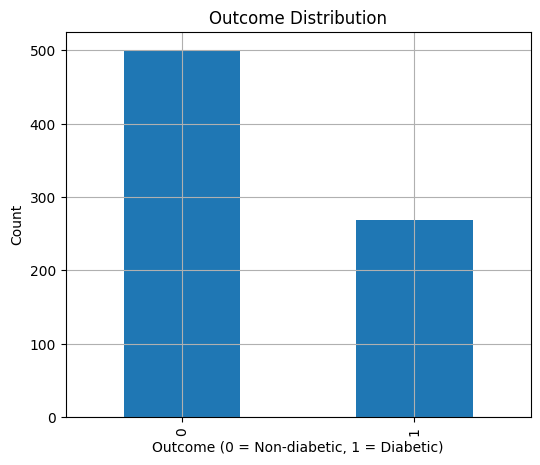

In [29]:
plt.figure(figsize=(6,5))
df['Outcome'].value_counts().plot(kind='bar')
plt.title("Outcome Distribution")
plt.xlabel("Outcome (0 = Non-diabetic, 1 = Diabetic)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


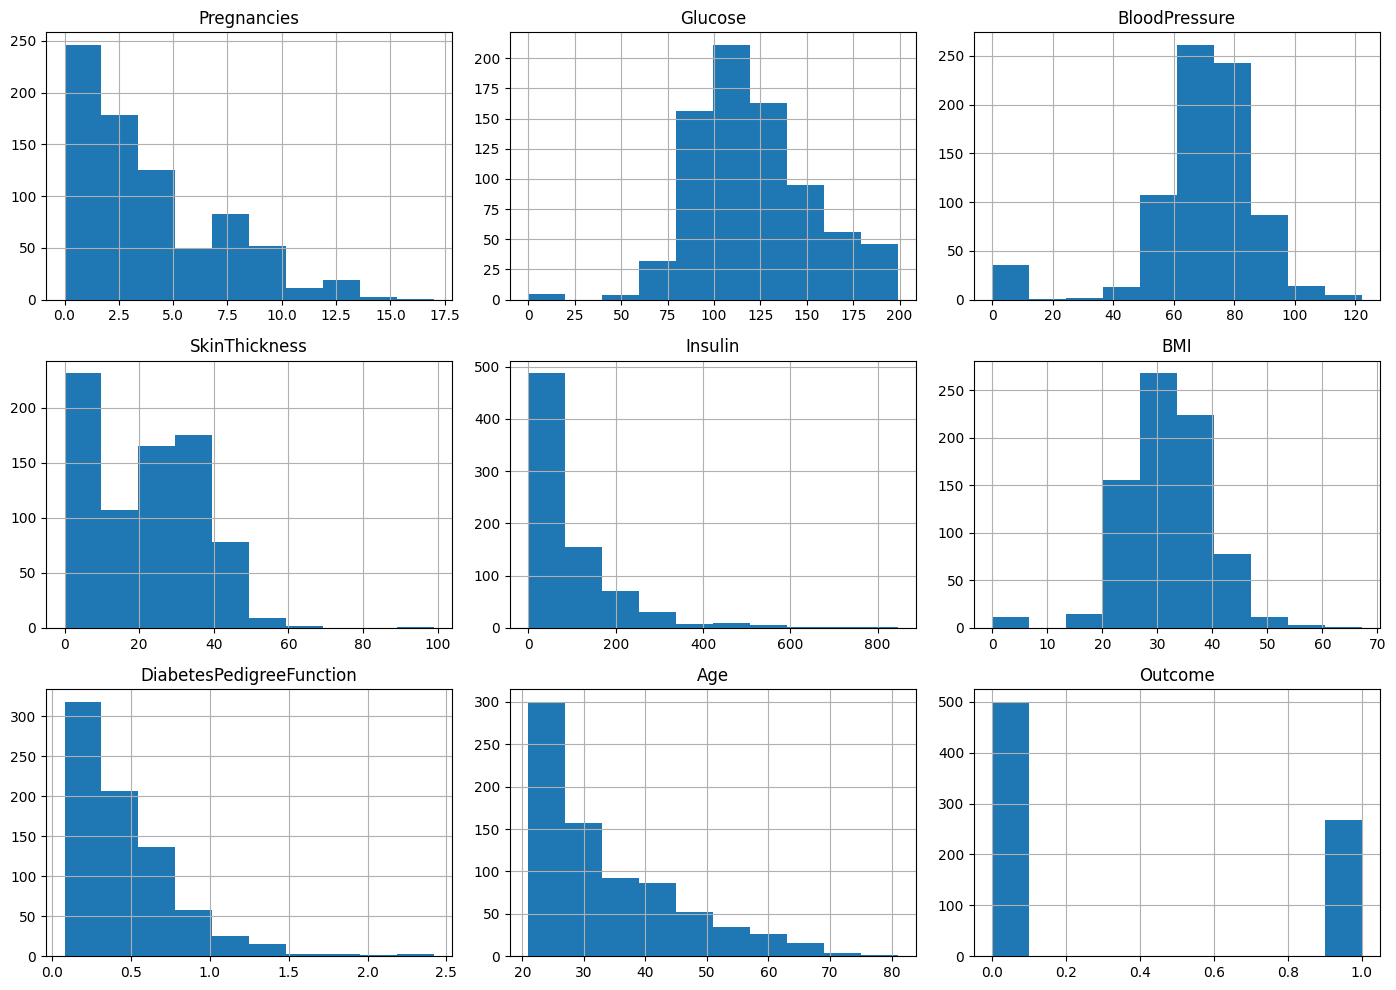

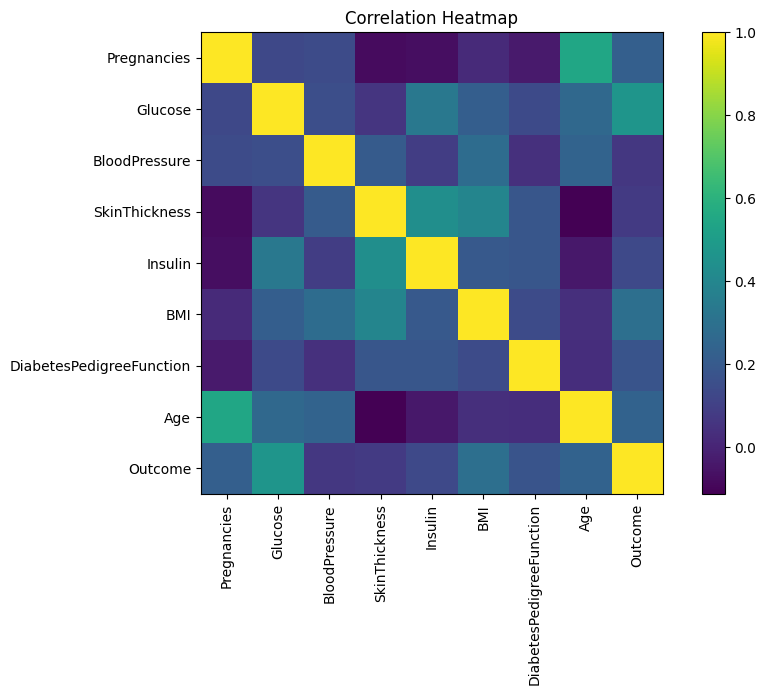

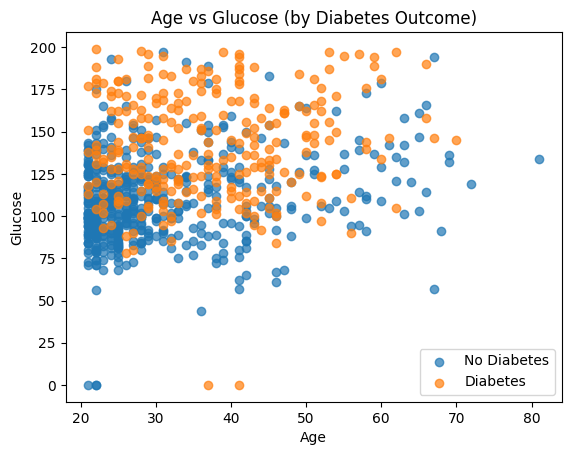

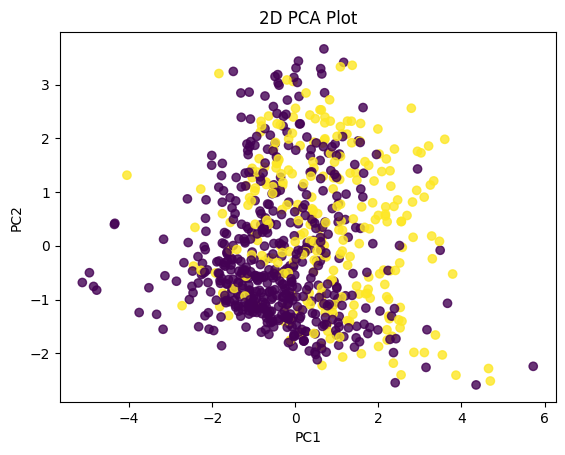

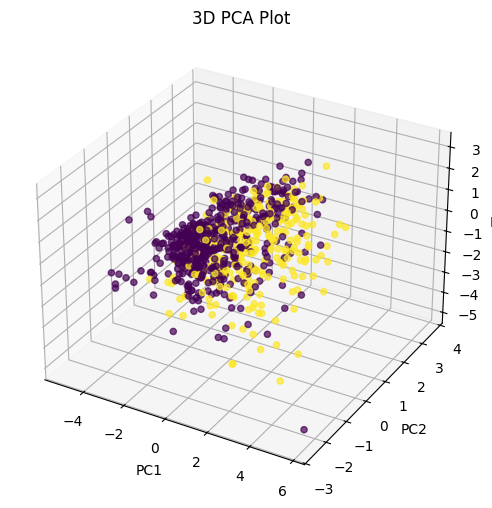

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Ensure df contains the diabetes dataset already loaded

# 1️⃣ Histograms for all features
df.hist(figsize=(14,10))
plt.tight_layout()
plt.show()

# 2️⃣ Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df.corr()
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# 3️⃣ Scatter plot: Age vs Glucose by Outcome
plt.figure()
plt.scatter(df[df['Outcome']==0]['Age'], df[df['Outcome']==0]['Glucose'], label='No Diabetes', alpha=0.7)
plt.scatter(df[df['Outcome']==1]['Age'], df[df['Outcome']==1]['Glucose'], label='Diabetes', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title("Age vs Glucose (by Diabetes Outcome)")
plt.legend()
plt.show()

# 4️⃣ PCA Visualization
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Plot")
plt.show()

# 5️⃣ 3D PCA Plot
from mpl_toolkits.mplot3d import Axes3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=y, alpha=0.7)
ax.set_title("3D PCA Plot")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


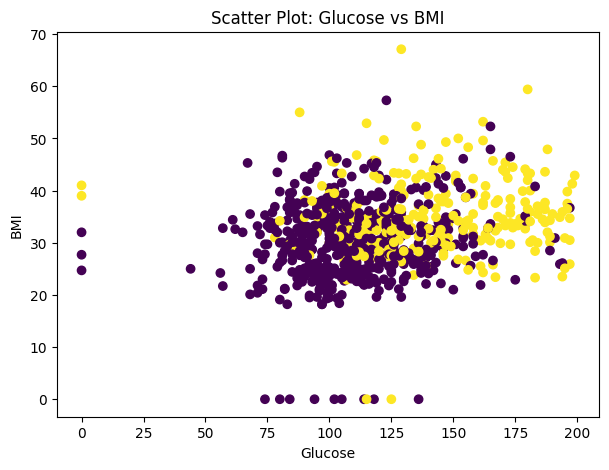

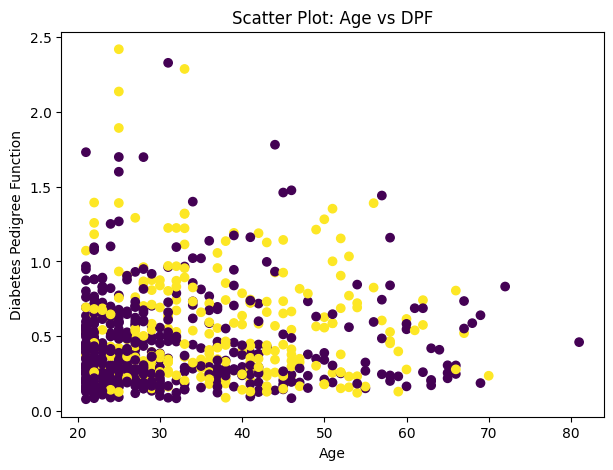

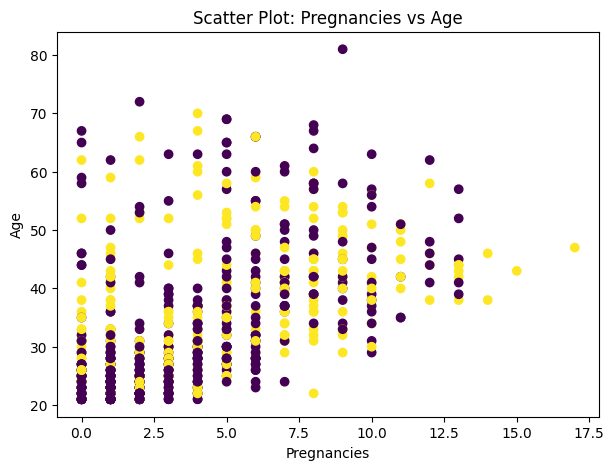

In [31]:
import matplotlib.pyplot as plt

# Scatter 1: Glucose vs BMI
plt.figure(figsize=(7,5))
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'])
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Scatter Plot: Glucose vs BMI")
plt.show()

# Scatter 2: Age vs DiabetesPedigreeFunction
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['DiabetesPedigreeFunction'], c=df['Outcome'])
plt.xlabel("Age")
plt.ylabel("Diabetes Pedigree Function")
plt.title("Scatter Plot: Age vs DPF")
plt.show()

# Scatter 3: Pregnancies vs Age
plt.figure(figsize=(7,5))
plt.scatter(df['Pregnancies'], df['Age'], c=df['Outcome'])
plt.xlabel("Pregnancies")
plt.ylabel("Age")
plt.title("Scatter Plot: Pregnancies vs Age")
plt.show()


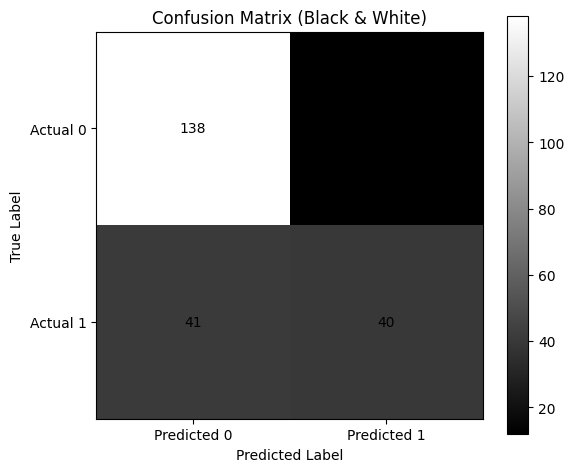

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Your confusion matrix values
cm = np.array([[138, 12],
               [41, 40]])

fig, ax = plt.subplots(figsize=(6,5))

# Use a pure grayscale colormap
im = ax.imshow(cm, cmap="gray")

# Ticks
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(["Predicted 0", "Predicted 1"])
ax.set_yticklabels(["Actual 0", "Actual 1"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Black & White)")

# Write numbers on the cells
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

# Add grayscale colorbar
plt.colorbar(im)

plt.tight_layout()
plt.show()
